# Initial Implementation

## Library Imports

Here, the necessary libraries are imported

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

## Filename

This declares the filename variable for the sample wavefile. It is a recording of an Bass E string strum, from [this recording](https://freesound.org/people/Kyster/sounds/117677/) on freesound.org.

In [12]:
FILE = "E7_chord_trimmed.wav"

## Reading the file

Here the file is read using the scipy.io.wavefile.read() function, which pulls the sample rate and the raw data. 

In [3]:
def read_wav(filename):
    return wavfile.read(filename)

## Plotting wavefile

This function plots the data that was read from the wavefile.

In [4]:
def plot_wav(sample_rate, data):
    length = data.shape[0] / sample_rate
    
    # prints the information from the file
    print(f"Recording length: {length:.3f}s")
    print(f"Sample Rate: {sample_rate}Hz")
    
    # creates a time array for plotting
    time = np.linspace(0., length, data.shape[0])
    
    # uses matplot.lib for plotting functions, plotting both audio channels
    plt.plot(time, data[:, 0], label="Left channel")
    plt.plot(time, data[:, 1], label="Right channel")
    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

## Perform FFT

This uses the numpy real FFT function to do a real-FFT on the data inputted to the function.

In [5]:
def do_fft(signal, sample_rate):
    fft_spectrum = np.fft.rfft(signal)
    freq = np.fft.rfftfreq(signal.size, d=1./sample_rate)  # get frequency values of FFT
    fft_spectrum_abs = np.abs(fft_spectrum)  # compute absolute value of FFT plot
    return freq, fft_spectrum_abs

## Plot FFT

This function takes in the frequency and FFT datasets and plots them using the matplot.lib functions.

In [61]:
def plot_fft(freq_array, fft_array):
    plt.plot(freq_array, fft_array)
#     fft_array = [n / min(fft_array) for n in fft_array]
    max(fft_array)
#     n, bins, patches = plt.hist(fft_array,color='blue', alpha=0.5)
    plt.xlabel("frequency, Hz")
    plt.ylabel("Amplitude, units")
    plt.show()

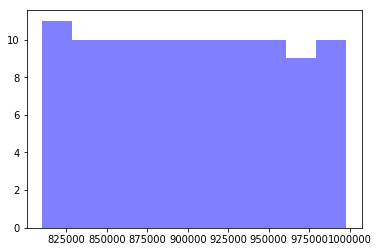

In [60]:
s = [i for i in range(10)]
k = [i**2 for i in range(900,1000)]
plot_fft(s,k)

## Get Max frequency

This function returns the frequency (in Hz) of the maximum amplitude from the FFT dataset and looking it up in the frequency dataset.

In [88]:
def get_top3_freq(freq_array, fft_array):
    freq = set()
    freq_array,fft_array = list(freq_array), list(fft_array)
    while len(freq) < 3:
        index_max = fft_array.index(max(fft_array))
        fft_array.pop(index_max)
        freq_array.pop(index_max)
        val = float(freq_array[index_max])
#         i = np.where(fft_array == max(fft_array))
#         val = float(freq_array[i[0]])
        if val not in freq:
            freq.add(val)
        #np.delete(fft_array, fft_array[i[0]])
        #np.delete(freq_array, freq_array[i[0]])
        print(len(fft_array))
    return freq

In [424]:
class Max:
    def __init__(self):
        self.ampl = 0
        self.freq = 0
        self.lwr_bnd = 0
        self.upr_bnd = 0
    
    def calc_bounds(self):
        if self.freq:
            self.lwr_bnd = self.freq - ((self.freq * 0.0280645232089) - 0.000609838013018)
            self.upr_bnd = self.freq + ((self.freq * 0.0297331943366) - 0.000226403391093)
    
    def in_freq_rng(self, freq) -> bool: 
        return self.lwr_bnd < freq < self.upr_bnd
            
def get_top(freq_array, fft_array, n):
    max_arr = [Max() for _ in range(n)]
    for i in range(len(freq_array)):
        
        curr_freq = freq_array[i]
        curr_ampl = fft_array[i]
        
        compare_ampl = curr_ampl
        compare_freq = curr_freq
        for _ in range(n):
            swap = False
            if max_arr[_].in_freq_rng(compare_freq):
                swap = True
            if max_arr[_].ampl < compare_ampl:
                temp_ampl = max_arr[_].ampl
                temp_freq = max_arr[_].freq
                max_arr[_].ampl = compare_ampl
                max_arr[_].freq = compare_freq
                max_arr[_].calc_bounds()
                if swap:
                    swap = False
                    break
                compare_ampl = temp_ampl
                compare_freq = temp_freq
            elif swap:
                break
    return [max_arr[_].freq for _ in range(n)]

In [419]:
a = [63.0, 82.0, 119.0, 125.0, 260.0, 555.0]
b = [2, 5, 6, 4, 3, 1]
print(get_top(a,b, 3))

[119.0, 82.0, 125.0]


## Get Closest Note

This function returns the string of the closest note depending on the pitch frequency given.

In [8]:
def get_note(pitch_freq):
    CONCERT_PITCH = 440 # tuning standard in music
    ALL_NOTES = ["A","A#","B","C","C#","D","D#","E","F","F#","G","G#"] # musical notes arranged properly
    i = int(np.round(np.log2(pitch_freq/CONCERT_PITCH)*12))
    return ALL_NOTES[i % 12] + str(4 + (i + 9) // 12)

## Run for timeit

This function runs all the function without the plots in order for software implementation timing.

In [9]:
def run_timed():
    sample_rate, data = read_wav(FILE)
    freq, fft = do_fft(data[:sample_rate,0], sample_rate) # only use one channel, 1 second of data
    wav_freq = get_freq(freq, fft)
    note = get_note(wav_freq)

In [165]:
%timeit run_timed()

10 loops, best of 3: 85.8 ms per loop


## Run

This function runs the all the functions with the plots for visualization of the data.

In [422]:
def run():
    sample_rate, data = read_wav(FILE)
    plot_wav(sample_rate, data)
    freq, fft = do_fft(data[22050:66150,0], sample_rate) # only use one channel, 1 second of data
    plot_fft(freq[:500], fft[:500])
    wav_freq = get_top(freq[:500], fft[:500], 5)
    print(f"Recording Frequency: {*wav_freq,}Hz")
    for n in wav_freq:
        note = get_note(n)
        print("Recording Note: " + note)

Recording length: 5.616s
Sample Rate: 44100Hz


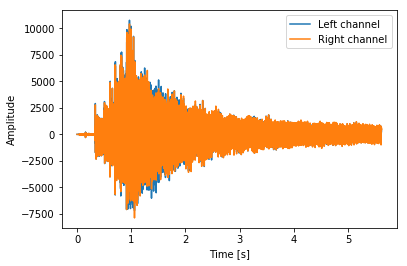

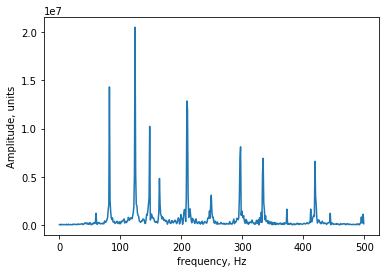

Recording Frequency: (124.0, 82.0, 209.0, 148.0, 297.0)Hz
Recording Note: B2
Recording Note: E2
Recording Note: G#3
Recording Note: D3
Recording Note: D4


In [423]:
run()

In [403]:
v_124 = 20514508.7 
v_82  = 14321464.1
v_209 = 12868846.7
v_210 = 12008986.5 # r
v_148 = 10233204.8
v_297 =  8104912.6
v_334 =  6919234.1
v_296 =  6843455.3 # r
v_419 =  6598724.4
v_333 =  5419576.0 # r
v_125 =  5308119.5 # r
v_123 =  5222202.3 # r
v_164 =  4828045.6
v_249 =  3099172.9
v_211 =  3094717.8 # r
v_420 =  3002678.3 # r
v_147 =  2797263.0 # r
v_208 =  2745627.3 # r
v_295 =  2728236.5 # r
v_83  =  2606114.6 # r
v_248 =  2120154.4 # r
v_214 =  1676738.3 # r
v_373 =  1642846.3
v_80  =  1590862.6 # r
v_60 =   1216498.6

N=10
  x      x     x      x     x       x            x      x       x
164.0, 82.0, 297.0, 124.0, 334.0, 419.0, 373.0, 249.0, 148.0, 209.0

N=11
  x     x       x     x      x             x       x    x      x  
297.0, 82.0, 334.0, 124.0, 419.0, 373.0, 249.0, 148.0, 209.0, 164.0, 60.0



IndentationError: unexpected indent (<ipython-input-403-15eec47084ac>, line 28)

## Expected Result

According to this [link](https://en.wikipedia.org/wiki/Guitar_tunings), the Bass E4 string (what the recording contains) should be 329.63Hz. The code should produce a number rather similar to the expected value (might be a little off, ~332Hz). The get_node function should then return as the closest node according to the given frequency of ~332Hz, which is the E4 note.